# Preprocessing

## Load the dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [17]:
credit_card_data = pd.read_csv('../data/creditcard.csv')

credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Basic preprocessing

### 1. Missing values

In [18]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 2. Class Imbalance
Class imbalance is crucial in fraud detection because models tend to ignore the rare fraud cases, leading to misleadingly high accuracy but poor real-world performance.

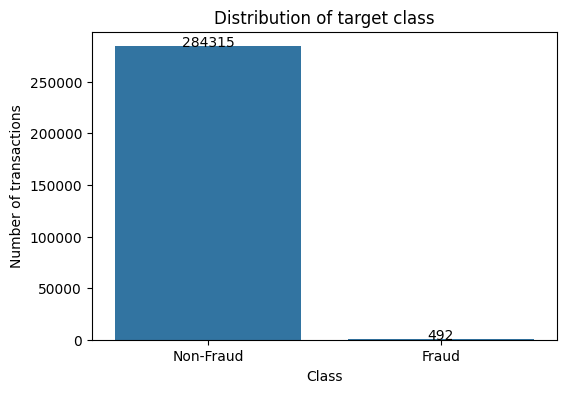

In [19]:
# Count the values and transform it to a dataframe
class_counts = credit_card_data.Class.value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

plt.figure(figsize=(6, 4))

ax = sns.barplot(x='Class', y='Count', data=class_counts)
ax.set_title("Distribution of target class")
ax.set_ylabel("Number of transactions")
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Fraud', 'Fraud'])

# Display the number of transaction on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height, f'{int(height)}', ha='center')

plt.show()

### 3. Correlation Check
Checking feature correlation helps identify redundant or highly related variables, which can simplify the model and reduce the risk of overfitting.

<Axes: >

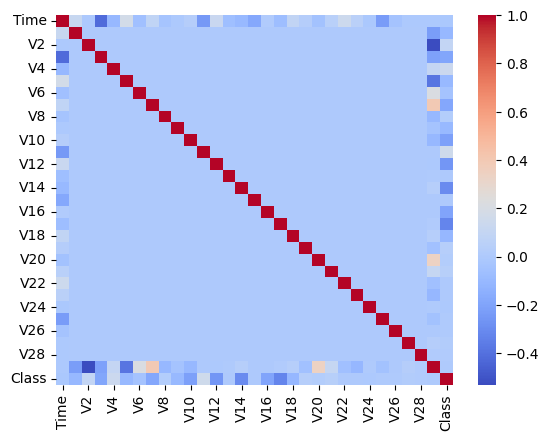

In [20]:
correlation_matrix = credit_card_data.corr()

sns.heatmap(correlation_matrix, cmap="coolwarm")

### 4. Distribution
It is important to check feature distributions to identify skewness, outliers, or irregularities that may affect model accuracy and stability.

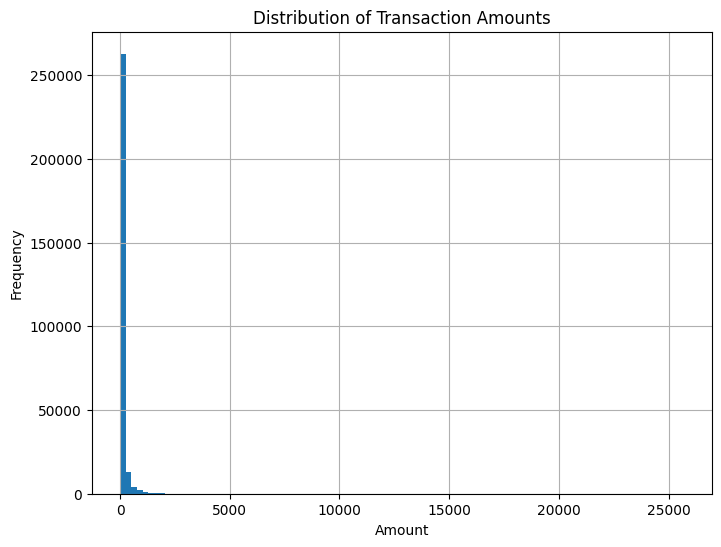

In [21]:
plt.figure(figsize=(8, 6))

credit_card_data['Amount'].hist(bins=100)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.show()

### 5. Outlier Detection

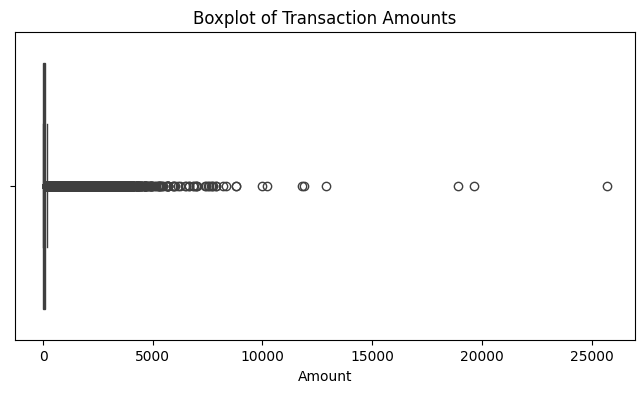

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=credit_card_data.Amount)
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

# Points beyond the whiskers are considered outliers.
# Here, many high-value transactions (right side) appear as outliers.
# These outliers represent important extreme transactions, so we keep them instead of removing.

### 6. Train-Test Split

In [23]:
X = credit_card_data.drop(columns=["Class"])
y = credit_card_data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### 7. Feature scaling
Feature scaling is important to make features comparable.
PCA features are already scaled, the Amount feature has a much larger range and should be scaled.<br /><br />

**Important:**<br />
To prevent data leakage, always perform the train-test split before applying any transformations that learn parameters from the data.

In [24]:

# Amount is clearly right-skewed, so we have to apply a log transformation to reduce skewness
X_train['Amount'] = np.log1p(X_train['Amount'])
X_test['Amount'] = np.log1p(X_test['Amount'])

scaler = StandardScaler()

X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

### 8. Data balancing
To address the class imbalance in the dataset, we apply SMOTE (Synthetic Minority Oversampling Technique) on the training data after feature scaling.

In [25]:

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)